# **1. Credit Card Fraud Detection**

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [83]:
df = pd.read_csv('/content/drive/MyDrive/AI VIETNAM/Module 5/data/creditcard.csv')

In [84]:
print(f"Shape: {df.shape}")

Shape: (284807, 31)


In [85]:
print(f"Unique Classes: {df['Class'].unique()}")

Unique Classes: [0 1]


In [86]:
dataset_arr = df.to_numpy()

X, y = dataset_arr[:, :-1].astype(np.float64), dataset_arr[:, -1].astype(np.uint8)

In [87]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (284807, 30)
y shape: (284807,)


In [88]:
intercept = np.ones([X.shape[0], 1])
X_b = np.concatenate((intercept, X), axis=1)

In [89]:
n_classes = np.unique(y, axis=0).shape[0]
n_samples = y.shape[0]

y_encoded = np.array([np.zeros(n_classes) for _ in range(n_samples)])
y_encoded[np.arange(n_samples), y] = 1

In [90]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X_b, y_encoded, test_size=val_size, random_state=random_state, shuffle=is_shuffle)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state, shuffle=is_shuffle)

In [91]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [92]:
def softmax(z):
  exp_z = np.exp(z)

  return exp_z / exp_z.sum(axis=1)[:, None]

In [93]:
def predict(X, theta):
  z = np.dot(X, theta)
  y_hat = softmax(z)

  return y_hat

In [94]:
def compute_loss(y_hat, y):
    n = y.shape[0]

    return (-1 / n) * np.sum(y * np.log(y_hat))

In [95]:
def compute_gradient(X, y, y_hat):
  n = y.size

  return np.dot(X.T, (y_hat - y)) / n

In [96]:
def update_theta(theta, gradient, lr):
  return theta - lr * gradient

In [97]:
def compute_accuracy(X, y, theta):
  y_hat = predict(X, theta)
  acc = (np.argmax(y_hat , axis=1) == np.argmax(y, axis=1)).mean()

  return acc

In [98]:
lr = 0.01
epochs = 30
batch_size = 1024
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(size=(n_features, n_classes))

In [99]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i + batch_size]
        y_i = y_train[i:i + batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat, y_i)
        gradient = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)

        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

    # Validation
    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_batch_losses.append(val_loss)

    val_acc = compute_accuracy(X_val, y_val, theta)
    val_batch_accs.append(val_acc)

    # Calculating average loss and accuracy for the epoch
    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f"\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}")



EPOCH 1:	Training loss: 0.601	Validation loss: 0.443

EPOCH 2:	Training loss: 0.352	Validation loss: 0.274

EPOCH 3:	Training loss: 0.229	Validation loss: 0.188

EPOCH 4:	Training loss: 0.163	Validation loss: 0.139

EPOCH 5:	Training loss: 0.124	Validation loss: 0.108

EPOCH 6:	Training loss: 0.099	Validation loss: 0.089

EPOCH 7:	Training loss: 0.082	Validation loss: 0.075

EPOCH 8:	Training loss: 0.071	Validation loss: 0.065

EPOCH 9:	Training loss: 0.062	Validation loss: 0.058

EPOCH 10:	Training loss: 0.055	Validation loss: 0.052

EPOCH 11:	Training loss: 0.050	Validation loss: 0.047

EPOCH 12:	Training loss: 0.046	Validation loss: 0.044

EPOCH 13:	Training loss: 0.043	Validation loss: 0.040

EPOCH 14:	Training loss: 0.040	Validation loss: 0.038

EPOCH 15:	Training loss: 0.037	Validation loss: 0.035

EPOCH 16:	Training loss: 0.035	Validation loss: 0.033

EPOCH 17:	Training loss: 0.033	Validation loss: 0.032

EPOCH 18:	Training loss: 0.031	Validation loss: 0.030

EPOCH 19:	Training

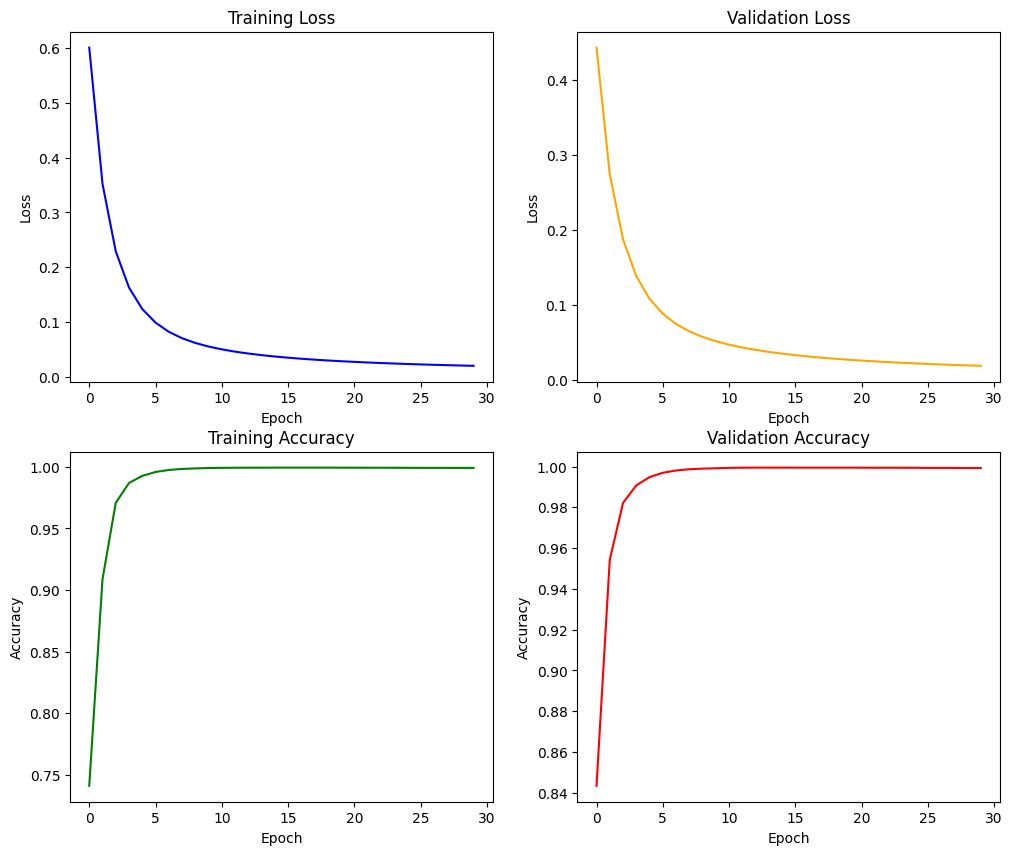

In [100]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plot training loss in blue
ax[0, 0].plot(train_losses, color='blue')
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

# Plot validation loss in orange
ax[0, 1].plot(val_losses, color='orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

# Plot training accuracy in green
ax[1, 0].plot(train_accs, color='green')
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

# Plot validation accuracy in red
ax[1, 1].plot(val_accs, color='red')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

In [101]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)

print('Evaluation on validation and test set:')
print(f'Validation Accuracy: {val_set_acc:.3f}')
print(f'Test Accuracy: {test_set_acc:.3f}')

Evaluation on validation and test set:
Validation Accuracy: 0.999
Test Accuracy: 0.999


# **2. Twitter Sentiment Analysis**

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [103]:
dataset_path = '/content/drive/MyDrive/AI VIETNAM/Module 5/data/Twitter_Data.csv'
df = pd.read_csv(dataset_path)
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [104]:
df = df.dropna()

In [105]:
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

def text_normalize(text):
    # Lowercasing
    text = text.lower()

    # Retweet acronym "RT" removal
    text = re.sub(r'^rt[\s]+', '', text)

    # Hyperlinks removal
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Punctuation removal
    text = re.sub(r'[^\w\s]', '', text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)

    # Stemming
    stemmer = SnowballStemmer('english')
    words = text.split()
    words = [stemmer.stem(word) for word in words]
    text = ' '.join(words)

    return text

In [106]:
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(df['clean_text']).toarray()

In [107]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

In [109]:
n_classes = df['category'].nunique()
n_samples = df['category'].size

# Convert labels to numerical values and ensure they start from 0
y = df['category'].to_numpy().astype(np.uint8) + 1

# Initialize one-hot encoded array
y_encoded = np.array([np.zeros(n_classes) for _ in range(n_samples)])
y_encoded[np.arange(n_samples), y] = 1

In [110]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

# First split: Train and Validation
X_train, X_val, y_train, y_val = train_test_split(
    X_b, y_encoded,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

# Second split: Train and Test
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

In [111]:
def softmax(z):
    exp_z = np.exp(z)
    return exp_z / exp_z.sum(axis=1)[:, None]

def compute_loss(y_hat, y):
    n = y.shape[0]
    return (-1 / n) * np.sum(y * np.log(y_hat + 1e-8))  # Adding a small constant to avoid log(0)

def predict(X, theta):
    z = np.dot(X, theta)
    y_hat = softmax(z)
    return y_hat

def compute_gradient(X, y, y_hat):
    n = y.shape[0]
    return np.dot(X.T, (y_hat - y)) / n

def update_theta(theta, gradient, lr):
    return theta - lr * gradient

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta)
    acc = (np.argmax(y_hat, axis=1) == np.argmax(y, axis=1)).mean()
    return acc


In [112]:
lr = 0.1
epochs = 200
batch_size = X_train.shape[0]
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(size=(n_features, n_classes))


In [113]:
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i + batch_size]
        y_i = y_train[i:i + batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat, y_i)
        gradient = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

    # Validation loss and accuracy
    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_batch_losses.append(val_loss)

    val_acc = compute_accuracy(X_val, y_val, theta)
    val_batch_accs.append(val_acc)

    # Calculate average losses and accuracies
    train_losses.append(np.mean(train_batch_losses))
    val_losses.append(np.mean(val_batch_losses))
    train_accs.append(np.mean(train_batch_accs))
    val_accs.append(np.mean(val_batch_accs))

    print(f"\nEPOCH {epoch + 1}:\tTraining loss: {train_losses[-1]:.3f}\tValidation loss: {val_losses[-1]:.3f}")



EPOCH 1:	Training loss: 1.132	Validation loss: 1.127

EPOCH 2:	Training loss: 1.129	Validation loss: 1.124

EPOCH 3:	Training loss: 1.126	Validation loss: 1.121

EPOCH 4:	Training loss: 1.123	Validation loss: 1.119

EPOCH 5:	Training loss: 1.121	Validation loss: 1.116

EPOCH 6:	Training loss: 1.118	Validation loss: 1.114

EPOCH 7:	Training loss: 1.116	Validation loss: 1.112

EPOCH 8:	Training loss: 1.114	Validation loss: 1.110

EPOCH 9:	Training loss: 1.112	Validation loss: 1.108

EPOCH 10:	Training loss: 1.110	Validation loss: 1.106

EPOCH 11:	Training loss: 1.108	Validation loss: 1.104

EPOCH 12:	Training loss: 1.106	Validation loss: 1.103

EPOCH 13:	Training loss: 1.105	Validation loss: 1.101

EPOCH 14:	Training loss: 1.103	Validation loss: 1.100

EPOCH 15:	Training loss: 1.102	Validation loss: 1.098

EPOCH 16:	Training loss: 1.101	Validation loss: 1.097

EPOCH 17:	Training loss: 1.099	Validation loss: 1.096

EPOCH 18:	Training loss: 1.098	Validation loss: 1.095

EPOCH 19:	Training

In [114]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)

print('Evaluation on validation and test set:')
print(f'Validation Accuracy: {val_set_acc:.3f}')
print(f'Test Accuracy: {test_set_acc:.3f}')


Evaluation on validation and test set:
Validation Accuracy: 0.443
Test Accuracy: 0.441
